In [48]:
%pylab inline
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

Populating the interactive namespace from numpy and matplotlib


D:\AdditionalProgramFiles\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


            WAG_C_M
month              
1993-01-01     15.3
1993-02-01     19.1
1993-03-01     23.6
1993-04-01     30.6
1993-05-01     37.5
...             ...
2016-04-01  36497.0
2016-05-01  37270.0
2016-06-01  38447.0
2016-07-01  35888.0
2016-08-01  34095.0

[284 rows x 1 columns]


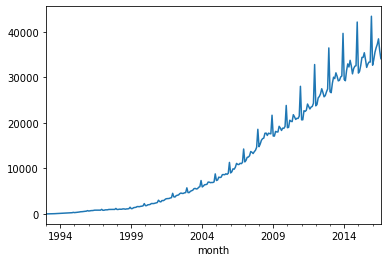

In [49]:
df = pd.read_csv('WAG_C_M.csv', sep=';', index_col=['month'], parse_dates=['month'], dayfirst=True)
print(df)
df.WAG_C_M.plot()

In [50]:
import statsmodels.api as sm
print('Значение не стационарности: %.4f'%sm.tsa.stattools.adfuller(df.WAG_C_M)[1])

Значение не стационарности: 0.9918


### Стабилизация дисперсии
Сделаем преобразование Бокса-Кокса для стабилизации дисперсии:

Оптимальный параметр преобразования Бокса-Кокса: 0.263202
Критерий Дики-Фуллера: p=0.696899


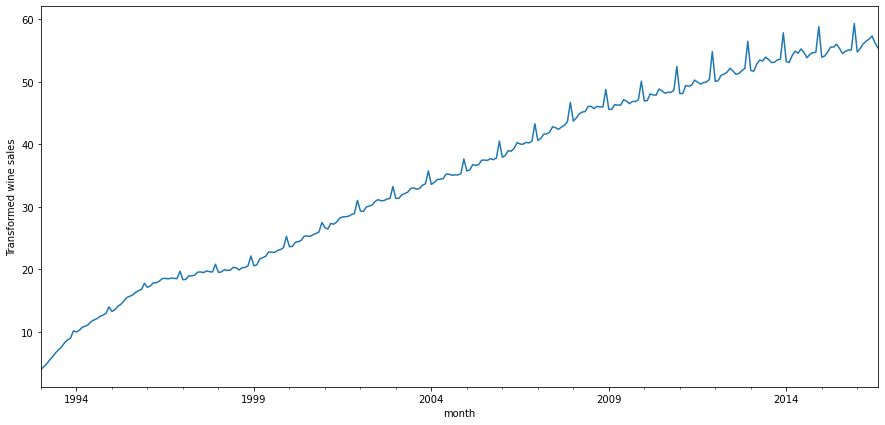

In [51]:
df['WAG_C_M_box'], lmbda = stats.boxcox(df.WAG_C_M)
plt.figure(figsize(15,7))
df.WAG_C_M_box.plot()
plt.ylabel(u'Transformed wine sales')
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df.WAG_C_M_box)[1])

### Стабилизация с помощью разделение на дни месяцов

            WAG_C_M  WAG_C_M_box   avgWAG_C_M
month                                        
1993-01-01     15.3     3.990393     0.493548
1993-02-01     19.1     4.458758     0.682143
1993-03-01     23.6     4.931635     0.761290
1993-04-01     30.6     5.549430     1.020000
1993-05-01     37.5     6.063406     1.209677
...             ...          ...          ...
2016-04-01  36497.0    56.526742  1216.566667
2016-05-01  37270.0    56.860441  1202.258065
2016-06-01  38447.0    57.358885  1281.566667
2016-07-01  35888.0    56.260153  1157.677419
2016-08-01  34095.0    55.455409  1099.838710

[284 rows x 3 columns]
Критерий Дики-Фуллера: p=0.990302


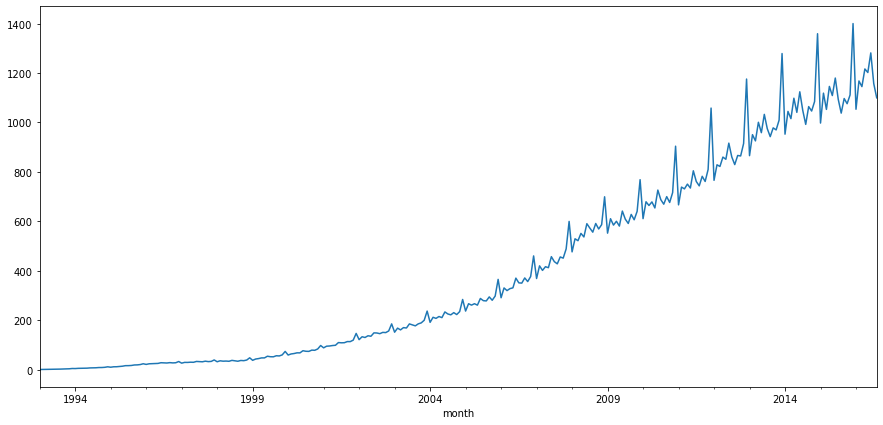

In [44]:
import calendar
days = []
for i in df.index:
    days.append(calendar.monthrange(i.year, i.month)[1])
    
df['avgWAG_C_M'] = df['WAG_C_M']/days
print(df)
df.avgWAG_C_M.plot()
print('Критерий Дики-Фуллера: p=%f' % sm.tsa.stattools.adfuller(df.avgWAG_C_M)[1])

__В качестве стабилизации выбираем преобразование Бокса-Кокса__

### Диффиринцирование

            WAG_C_M  WAG_C_M_box  daily_diff1
month                                        
1993-01-01     15.3     3.990393          NaN
1993-02-01     19.1     4.458758     0.468365
1993-03-01     23.6     4.931635     0.472877
1993-04-01     30.6     5.549430     0.617795
1993-05-01     37.5     6.063406     0.513976
...             ...          ...          ...
2016-04-01  36497.0    56.526742     0.437734
2016-05-01  37270.0    56.860441     0.333700
2016-06-01  38447.0    57.358885     0.498444
2016-07-01  35888.0    56.260153    -1.098732
2016-08-01  34095.0    55.455409    -0.804743

[284 rows x 3 columns]
Критерий Дики-Фуллера: p=0.014396


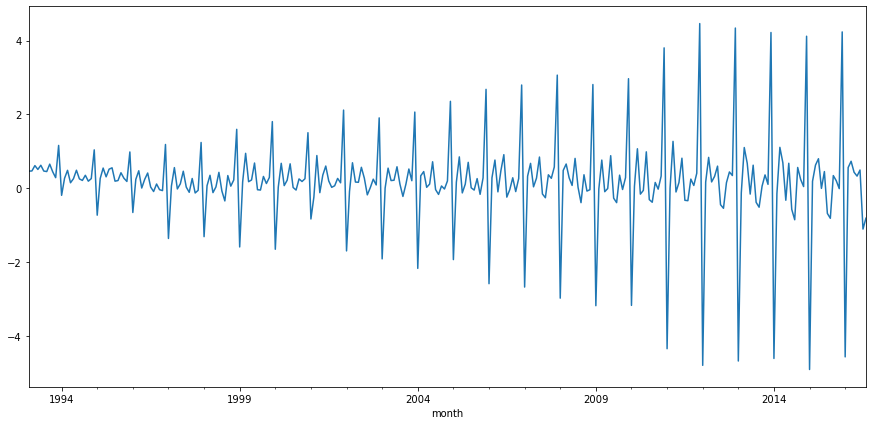

In [52]:
df['daily_diff1'] = df.WAG_C_M_box - df.WAG_C_M_box.shift(1)
print(df)
df.daily_diff1[1:].plot()
print('Критерий Дики-Фуллера: p=%f'%sm.tsa.stattools.adfuller(df.daily_diff1[1:])[1])

            WAG_C_M  WAG_C_M_box  daily_diff1  daily_diff12
month                                                      
1993-01-01     15.3     3.990393          NaN           NaN
1993-02-01     19.1     4.458758     0.468365           NaN
1993-03-01     23.6     4.931635     0.472877           NaN
1993-04-01     30.6     5.549430     0.617795           NaN
1993-05-01     37.5     6.063406     0.513976           NaN
...             ...          ...          ...           ...
2016-04-01  36497.0    56.526742     0.437734      0.942729
2016-05-01  37270.0    56.860441     0.333700      1.275065
2016-06-01  38447.0    57.358885     0.498444      1.316994
2016-07-01  35888.0    56.260153    -1.098732      0.893671
2016-08-01  34095.0    55.455409    -0.804743      0.896620

[284 rows x 4 columns]
Критерий Дики-Фуллера: p=0.014697


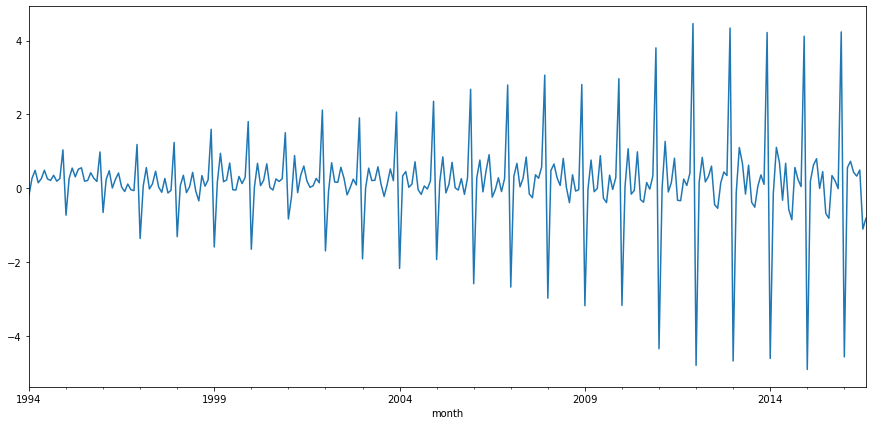

In [53]:
df['daily_diff12'] = df.WAG_C_M_box - df.WAG_C_M_box.shift(12)
print(df)
df.daily_diff1[12:].plot()
print('Критерий Дики-Фуллера: p=%f'%sm.tsa.stattools.adfuller(df.daily_diff12[12:])[1])

            WAG_C_M  WAG_C_M_box  daily_diff1  daily_diff12  daily_diff12and1
month                                                                        
1993-01-01     15.3     3.990393          NaN           NaN               NaN
1993-02-01     19.1     4.458758     0.468365           NaN               NaN
1993-03-01     23.6     4.931635     0.472877           NaN               NaN
1993-04-01     30.6     5.549430     0.617795           NaN               NaN
1993-05-01     37.5     6.063406     0.513976           NaN               NaN
...             ...          ...          ...           ...               ...
2016-04-01  36497.0    56.526742     0.437734      0.942729         -0.366210
2016-05-01  37270.0    56.860441     0.333700      1.275065          0.332336
2016-06-01  38447.0    57.358885     0.498444      1.316994          0.041929
2016-07-01  35888.0    56.260153    -1.098732      0.893671         -0.423323
2016-08-01  34095.0    55.455409    -0.804743      0.896620     

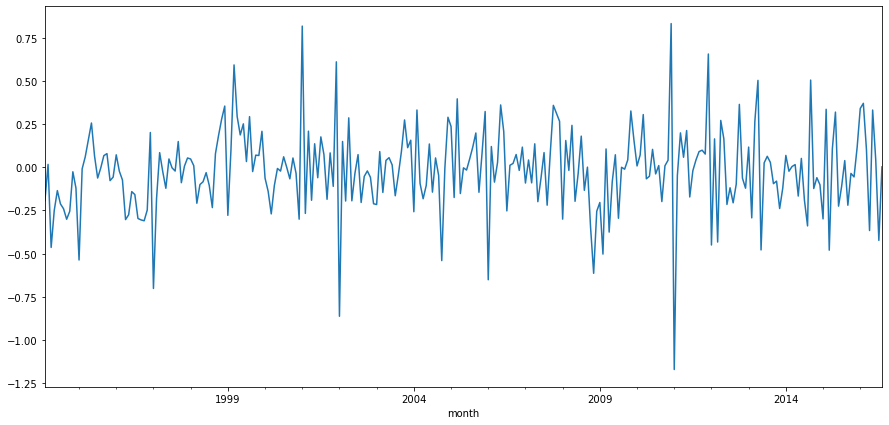

In [56]:
df['daily_diff12and1'] = df.daily_diff12 - df.daily_diff12.shift(1)
print(df)
df.daily_diff12and1[13:].plot()
print('Критерий Дики-Фуллера: p=%.8f'%sm.tsa.stattools.adfuller(df.daily_diff12and1[13:])[1])

__Все результаты стационарны, но все-таки я выберу последную потому что у него самый маленький значение значимости__

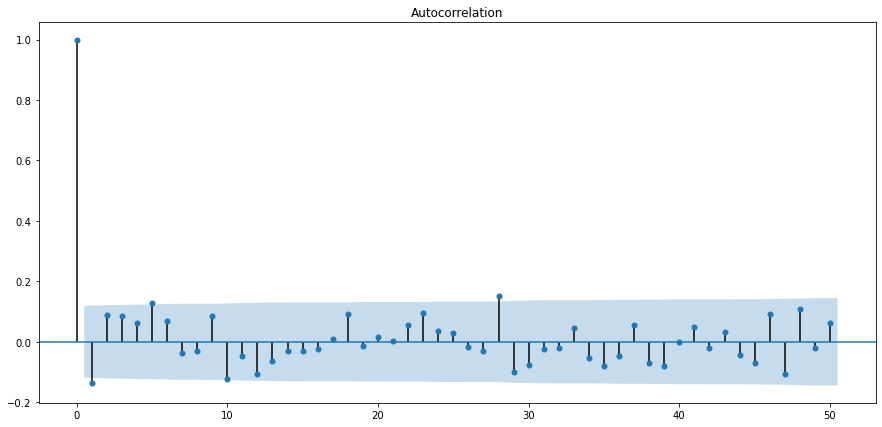

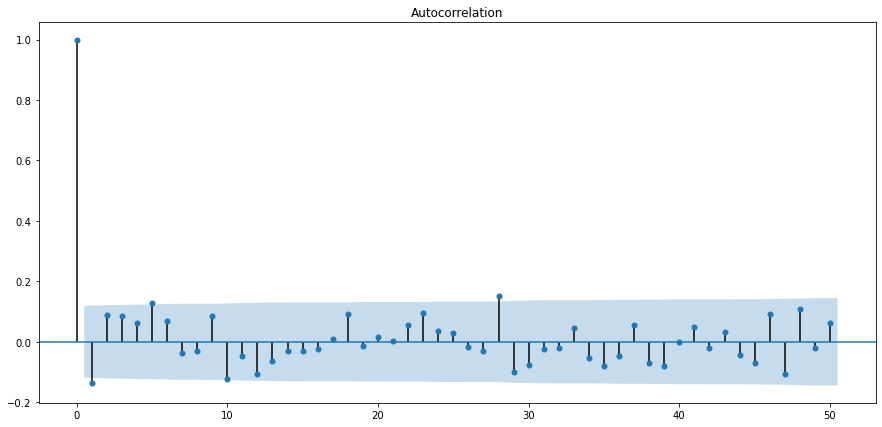

In [63]:
sm.graphics.tsa.plot_acf(df.daily_diff12and1[13:].values.squeeze(), lags=50)

__Q большой 0 потому что сезонный лаг равно 0 и 0/12 то будет 0. q маленьки будет 1__

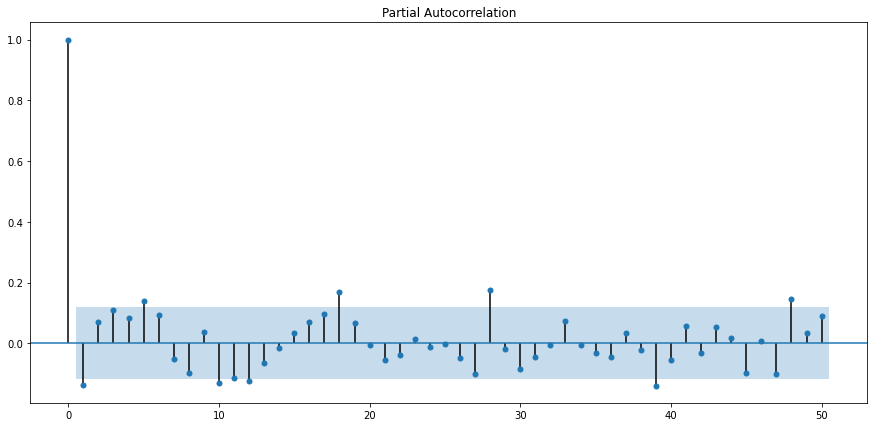

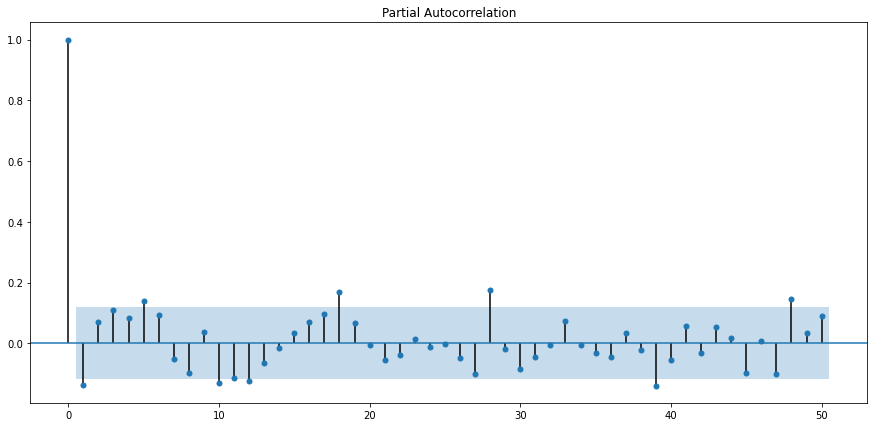

In [64]:
sm.graphics.tsa.plot_pacf(df.daily_diff12and1[13:].values.squeeze(), lags=50)

__P большой 4 потому что сезонный лаг равно 48 немного выходят из линии и 48/12 то будет 4. p маленьки будет 1, потому что от 0 до 12 самый продолжительный от началы это лаг номером 1__

## Подбор модели

__Мои ответы: Q=0, q=1, P=4, p=1__

In [65]:
ps = range(0, 5)
d=1
qs = range(0, 3)
Ps = range(0, 2)
D=1
Qs = range(0, 2)

In [66]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

60

In [69]:
?sm.tsa.statespace.SARIMAX

In [77]:
%%time
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(df.WAG_C_M_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12),
                                       initialization='approximate_diffuse').fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

Wall time: 56.6 s


In [78]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

D:\AdditionalProgramFiles\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      parameters         aic
32  (2, 2, 0, 0)  201.016001
20  (1, 2, 0, 0)  206.094145
12  (1, 0, 0, 0)  206.821433
36  (3, 0, 0, 0)  207.261921
28  (2, 1, 0, 0)  207.281864


Лучшая модель:

In [79]:
print(best_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                         WAG_C_M_box   No. Observations:                  284
Model:             SARIMAX(2, 1, 2)x(0, 1, [], 12)   Log Likelihood                 -95.508
Date:                             Sun, 06 Sep 2020   AIC                            201.016
Time:                                     04:40:16   BIC                            219.261
Sample:                                 01-01-1993   HQIC                           208.331
                                      - 08-01-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0057      0.123      8.183      0.000       0.765       1.247
ar.L2         -0.2712      

D:\AdditionalProgramFiles\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Её остатки:

Критерий Стьюдента: p=0.281249
Критерий Дики-Фуллера: p=0.000000


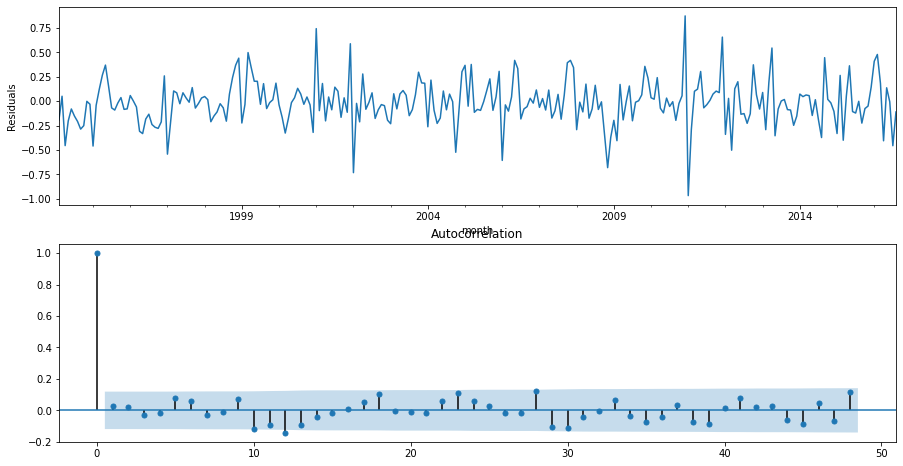

In [81]:
plt.figure(figsize(15,8))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

Остатки несмещены (подтверждается критерием Стьюдента) стационарны (подтверждается критерием Дики-Фуллера и визуально), неавтокоррелированы (подтверждается критерием Льюнга-Бокса и коррелограммой).
Посмотрим, насколько хорошо модель описывает данные:

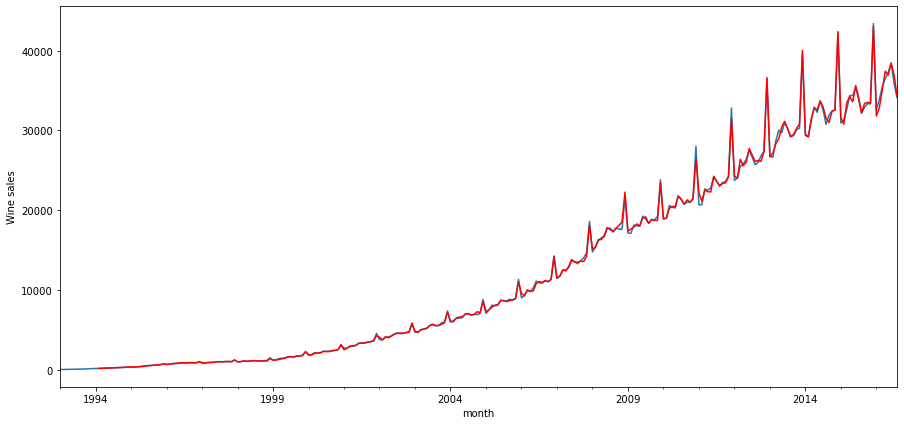

In [84]:
df['model'] = invboxcox(best_model.fittedvalues, lmbda)
plt.figure(figsize(15,7))
df.WAG_C_M.plot()
df.model[13:].plot(color='r')
plt.ylabel('Wine sales')
pylab.show()

### Прогноз

In [87]:
df.tail(1)

D:\AdditionalProgramFiles\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,WAG_C_M,WAG_C_M_box,daily_diff1,daily_diff12,daily_diff12and1,model
month,,,,,,
2016-08-01,34095.0,55.455409,-0.804743,0.89662,0.002949,34337.470637


In [88]:
df

D:\AdditionalProgramFiles\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,WAG_C_M,WAG_C_M_box,daily_diff1,daily_diff12,daily_diff12and1,model
month,,,,,,
1993-01-01,15.3,3.990393,NaN,NaN,NaN,1.000000
1993-02-01,19.1,4.458758,0.468365,NaN,NaN,27.937566
1993-03-01,23.6,4.931635,0.472877,NaN,NaN,23.841866
1993-04-01,30.6,5.549430,0.617795,NaN,NaN,26.507565
1993-05-01,37.5,6.063406,0.513976,NaN,NaN,33.542172
...,...,...,...,...,...,...
2016-04-01,36497.0,56.526742,0.437734,0.942729,-0.366210,37439.500839
2016-05-01,37270.0,56.860441,0.333700,1.275065,0.332336,36950.592598
2016-06-01,38447.0,57.358885,0.498444,1.316994,0.041929,38461.290871


D:\AdditionalProgramFiles\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


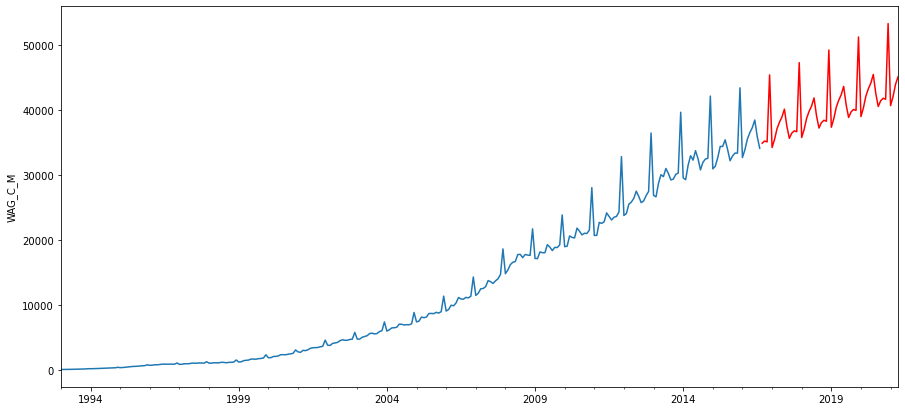

In [91]:
df2 = df[['WAG_C_M']]
date_list = [datetime.datetime.strptime("2016-09-01", "%Y-%m-%d") + relativedelta(months=x) for x in range(0,56)]
future = pd.DataFrame(index=date_list, columns= df2.columns)
df2 = pd.concat([df2, future])
df2['forecast'] = invboxcox(best_model.predict(start=284, end=341), lmbda)

plt.figure(figsize(15,7))
df2.WAG_C_M.plot()
df2.forecast.plot(color='r')
plt.ylabel('WAG_C_M')
pylab.show()

### Если посмотреть то оно хорошо прогнозирует